<a href="https://colab.research.google.com/github/desunny/example/blob/desunny-steel/(forS)_Lec11_%EC%9D%B8%EA%B3%B5%EC%8B%A0%EA%B2%BD%EB%A7%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 인공신경망

## 패션 MNIST 데이터 로드

In [ ]:
from tensorflow import keras

(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [ ]:
# 데이터 크기 확인 (6만개의 훈련 이미지, 1만개의 테스트 이미지 )
print(train_input.shape, train_target.shape, test_input.shape, test_target.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


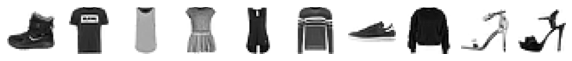

In [ ]:
#맷플롯립 라이브러리로 이미지 샘플링 확인
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 10, figsize=(10,10))

for i in range(10):
  axs[i].imshow(train_input[i], cmap='gray_r') #gray_r 반전 흑백 이미지 
  axs[i].axis('off') #on으로 바꿔 보세요. 
plt.show()



In [ ]:
#train_target 데이터 확인하기 
print([train_target[i] for i in range(10)])

#train_target 샘플의 갯수 확인 
import numpy as np 
print(np.unique(train_target, return_counts = True)) # 0~9까지 6000개씩

[9, 0, 0, 3, 0, 2, 7, 2, 5, 5]
(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]))


## 인공신경망

### 인공신경망으로 모델 만들기
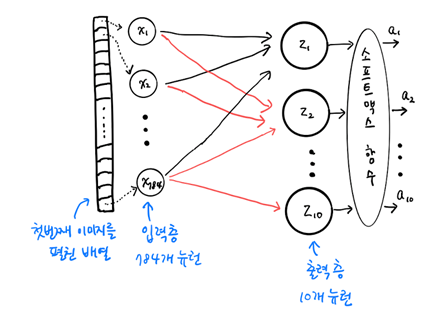

In [ ]:
#데이터를 1차원 배열로 만들기 (for SGDClassifier)
train_scaled = train_input / 255.0 #0~1사이의 값으로 정규화하기 위해서 255로 나눔. 양수값으로 이루어진 이미지를 전처리할 때 사용 
print(train_scaled.shape)
train_scaled = train_scaled.reshape(-1, 28*28) #2차원 배열을 1차원 배열로 펼치기 
print(train_scaled.shape)

test_scaled = test_input / 255.0
test_scaled = test_scaled.reshape(-1, 28*28) #2차원 배열을 1차원 배열로 펼치기 



(60000, 28, 28)
(60000, 784)


In [ ]:
from sklearn.model_selection import train_test_split 
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2, random_state=42) #validation data set 만들기 

print(train_scaled.shape, train_target.shape)

(48000, 784) (48000,)


In [ ]:
#모델 만들기 
dense = keras.layers.Dense(10, activation='softmax', input_shape=(784,)) # 10 - 뉴런갯수, softmax - 다중분류 / sigmoid - 이진분류, input_shape 입력의 크기 
model = keras.Sequential(dense) #밀집층 모델 생성 

### 인공신경망으로 패션 아이템 분류하기 
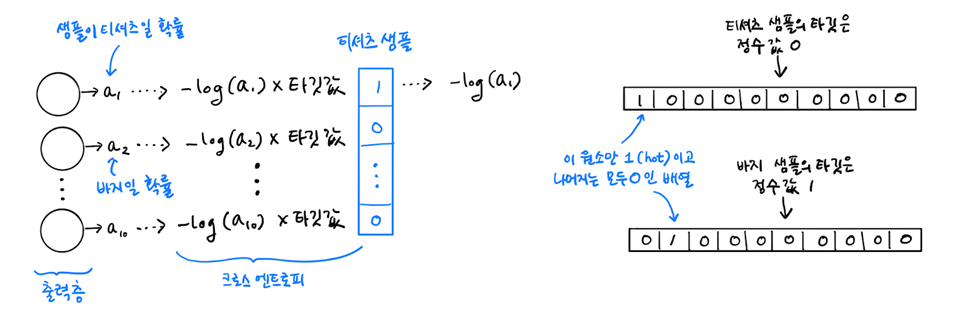

In [ ]:
#모델 컴파일 
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')  #(손실함수, 지표)
#loss 손실함수 (인공신경망의 성능 지표 중 하나로 가중치의 값이 변할 때 손실함수의 값도 미분하여 연속적으로 변화함. 정확도는 가중치변화에 둔감함.)
# - 정수로된 타깃값을 원핫 인코딩 없이 바로 사용할 때: saprse_categorical_crossentropy 
# - 원핫인코딩 사용: 이진분류-loss = 'binary_crossentropy', 다중분류-loss='categorical_crossentropy' 
#왜 원핫 인코딩을 사용하나? 다중 분류기 때문에 출력 유닛에서 나오는 확률과 곱하기 위해서. 

#모델 훈련 
model.fit(train_scaled, train_target, epochs=5)


Epoch 1/5
1500/1500 [==============================] - 6s 2ms/step - loss: 0.6094 - accuracy: 0.7934
Epoch 2/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4785 - accuracy: 0.8391
Epoch 3/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4553 - accuracy: 0.8492
Epoch 4/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4443 - accuracy: 0.8516
Epoch 5/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4368 - accuracy: 0.8564


In [ ]:
#모델 성능 평가 
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 2ms/step - loss: 0.4388 - accuracy: 0.8529


[0.4387795329093933, 0.8529166579246521]

In [ ]:
#모델 성능 평가 (by 테스트 데이터 )

model.evaluate(test_scaled, test_target)

313/313 [==============================] - 1s 3ms/step - loss: 0.3875 - accuracy: 0.8677


[0.3874781131744385, 0.8676999807357788]

#심층 신경망

## 2개의 층
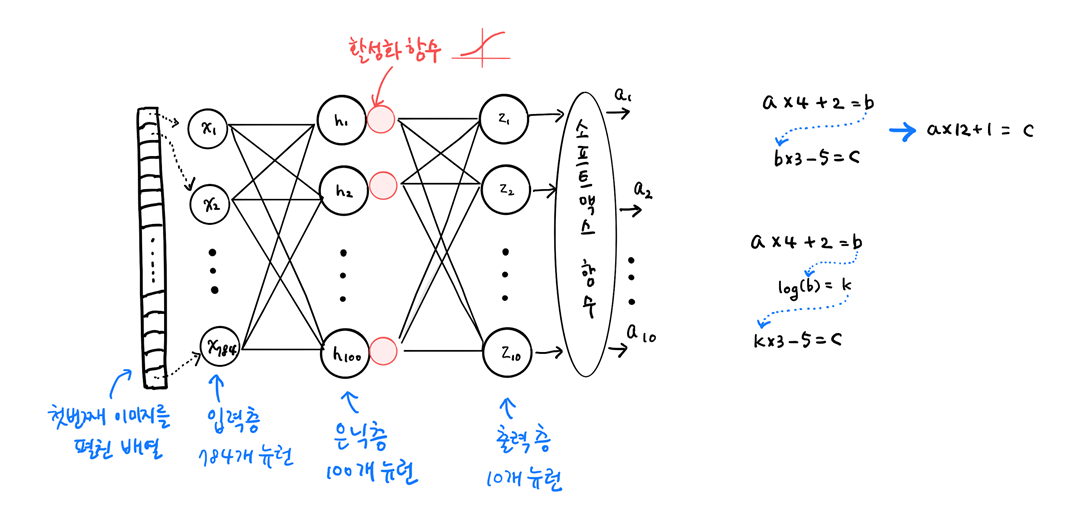

## 심층 신경망 만들기
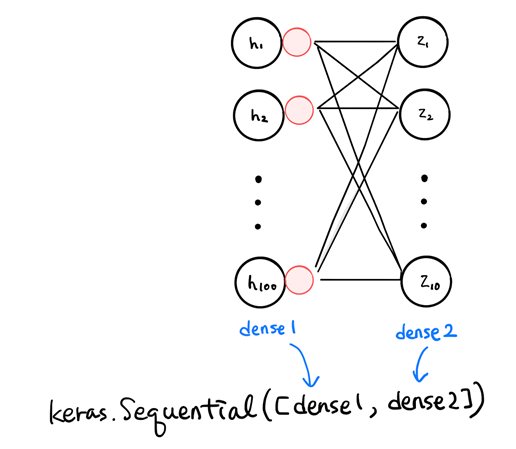

In [ ]:
from tensorflow import keras

(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

In [ ]:
#데이터를 1차원 배열로 만들기 (for SGDClassifier)
train_scaled = train_input / 255.0 #0~1사이의 값으로 정규화하기 위해서 255로 나눔. 양수값으로 이루어진 이미지를 전처리할 때 사용 
train_scaled = train_scaled.reshape(-1, 28*28) #2차원 배열을 1차원 배열로 펼치기 
print(train_scaled.shape)

#train, validataion 분할 
from sklearn.model_selection import train_test_split 
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2, random_state=42) #validation data set 만들기 


test_scaled = test_input / 255.0
test_scaled = test_scaled.reshape(-1, 28*28) #2차원 배열을 1차원 배열로 펼치기 
print(test_scaled.shape)



(60000, 784)
(10000, 784)


In [ ]:
#모델 생성
dense1 = keras.layers.Dense(100, activation='sigmoid', input_shape=(784,)) #은닉층
dense2 = keras.layers.Dense(10, activation='softmax') #출력층
model = keras.Sequential([dense1, dense2], name='fashion_model')
model.summary()

Model: "fashion_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 100)               78500     
_________________________________________________________________
dense_14 (Dense)             (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#모델 훈련 
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.5619 - accuracy: 0.8084
Epoch 2/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4073 - accuracy: 0.8524
Epoch 3/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3734 - accuracy: 0.8655
Epoch 4/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3516 - accuracy: 0.8726
Epoch 5/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3345 - accuracy: 0.8783


In [ ]:
#모델 성능 평가 
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 2ms/step - loss: 0.3663 - accuracy: 0.8651


[0.3662893772125244, 0.8650833368301392]

##### 실습1. 테스트 데이터를 이용하여 모델 성능 평가를 하시오. 

313/313 [==============================] - 1s 3ms/step - loss: 0.3996 - accuracy: 0.8569


[0.39955565333366394, 0.8568999767303467]

## relu 함수 사용 + Faltten 사용(for 데이터 1차원 배열로 만들기)

In [ ]:
from tensorflow import keras

(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

In [ ]:
#데이터를 1차원 배열로 만들기 (for SGDClassifier)
train_scaled = train_input / 255.0 #0~1사이의 값으로 정규화하기 위해서 255로 나눔. 양수값으로 이루어진 이미지를 전처리할 때 사용 
#train_scaled = train_scaled.reshape(-1, 28*28) #2차원 배열을 1차원 배열로 펼치기 
print(train_scaled.shape)

#train, validataion 분할 
from sklearn.model_selection import train_test_split 
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2, random_state=42) #validation data set 만들기 


test_scaled = test_input / 255.0
#test_scaled = test_scaled.reshape(-1, 28*28) #2차원 배열을 1차원 배열로 펼치기 
print(test_scaled.shape)



(60000, 28, 28)
(10000, 28, 28)


In [ ]:
# 모델 성능 향상 - relu activation 함수 사용, 플래튼 층을 이용하기 () 
model = keras.Sequential(name='fashion_mnst_relu')
model.add(keras.layers.Flatten(input_shape=(28,28))) #넘파이 배열의 reshape 대신에 flatten 사용 
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))
model.summary()

Model: "fashion_mnst_relu"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_17 (Dense)             (None, 100)               78500     
_________________________________________________________________
dense_18 (Dense)             (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


#### 실습2. 위에서 생성한 모델을 훈련시키고 평가하세요. 

In [ ]:
# 1. 모델 컴파일 후 훈련 시키기 


Epoch 1/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3058 - accuracy: 0.8930
Epoch 2/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2940 - accuracy: 0.8955
Epoch 3/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2874 - accuracy: 0.8993
Epoch 4/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2809 - accuracy: 0.9018
Epoch 5/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2734 - accuracy: 0.9048


In [ ]:
# 2. 밸리데이션 데이터로 모델 평가하기


375/375 [==============================] - 1s 2ms/step - loss: 0.3877 - accuracy: 0.8814


[0.38765451312065125, 0.8814166784286499]

In [ ]:
# 3. 테스트 데이터로 모델 평가하기


313/313 [==============================] - 1s 3ms/step - loss: 0.4156 - accuracy: 0.8702


[0.4155779778957367, 0.870199978351593]

## 옵티마이저 변경하기
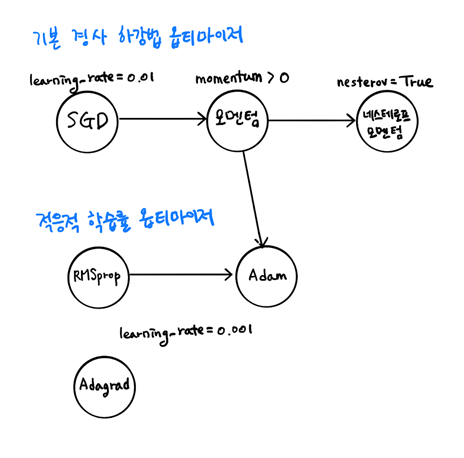

In [ ]:
model = keras.Sequential(name='fashion_mnst_relu')
model.add(keras.layers.Flatten(input_shape=(28,28))) #넘파이 배열의 reshape 대신에 flatten 사용 
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

#model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics='accuracy')

#기본경사 하강법 옵티마이저
#sgd = keras.optimizers.SGD(learning_rate=0.1)
#sgd = keras.optimizers.SGD(momentum=0.9, nesterov=True) #모멘텀: 이전의 그레디언트를 가속도로 사용 / 네스트로프모멘텀: 모멘텀 최적화를 2번 반복 사용 
#model.compile(optimizer=sgd, loss='sparse_categorical_crossentropy', metrics='accuracy')

#적응적 학습률 옵티마이저 : 모델이 최적점에 가까이 가면 학습률을 낮추어 안정적으로 최적점에 수렴하도록 하는 방법 
#adagrad = keras.optimizers.Adagrad()
#model.compile(optimizer=adagrad, loss='sparse_categorical_crossentropy', metrics='accuracy')

#rmsprop = keras.optimizers.RMSProp() #기본 옵티마이저
#model.compile(optimizer=rmsprop, loss='sparse_categorical_crossentropy', metrics='accuracy')

#adam = RMSProp + 모멘텀
ada = keras.optimizers.Adam()
model.compile(optimizer=ada, loss='sparse_categorical_crossentropy', metrics='accuracy')
model.fit(train_scaled, train_target, epochs=5)



Epoch 1/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.5274 - accuracy: 0.8165
Epoch 2/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3974 - accuracy: 0.8587
Epoch 3/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3555 - accuracy: 0.8713
Epoch 4/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3314 - accuracy: 0.8778
Epoch 5/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3098 - accuracy: 0.8866


In [ ]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 2ms/step - loss: 0.3600 - accuracy: 0.8701


[0.35996270179748535, 0.8700833320617676]

In [ ]:
model.evaluate(test_scaled, test_target)

313/313 [==============================] - 1s 3ms/step - loss: 0.3843 - accuracy: 0.8637


[0.3842965364456177, 0.8636999726295471]

#신경망 모델 훈련

##손실곡선
 - 케라스의 fit()메소드는 History 클래스 객체를 반환함. History객체에서는 훈련 과정에서 계산한 지표, 즉 손실과 정확도 값이 저장되어 있음 

In [ ]:
#데이터 로드 
from tensorflow import keras
from sklearn.model_selection import train_test_split
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

train_scaled = train_input /255.0 
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)

In [ ]:
#모델 생성 함수 정의 
def model_fn(a_layer=None):
  model = keras.Sequential()
  model.add(keras.layers.Flatten(input_shape=(28, 28)))
  model.add(keras.layers.Dense(100, activation='relu'))
  if a_layer: 
    model.add(a_layer)
  model.add(keras.layers.Dense(10, activation='softmax')) 

  return model 

In [ ]:
# 모델 생성 
model = model_fn()
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_6 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_21 (Dense)             (None, 100)               78500     
_________________________________________________________________
dense_22 (Dense)             (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#모델 컴파일 & 훈련 
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=5, verbose=0) #verbose 훈련과정 출력을 조정함. 1 상세한 훈련과정, 2 덜 상세, 0 출력 x ) 
print(history.history.keys()) #훈련측정값

dict_keys(['loss', 'accuracy'])


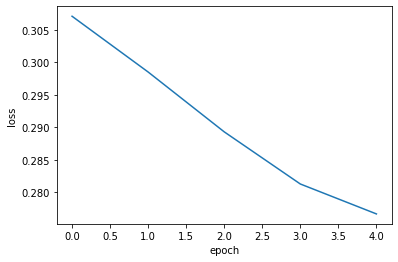

In [ ]:
#손실 시각화
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
#plt.plot(history.history['accuracy'])
plt.xlabel('epoch')
plt.ylabel('loss')
#plt.ylabel('accuracy')
plt.show()

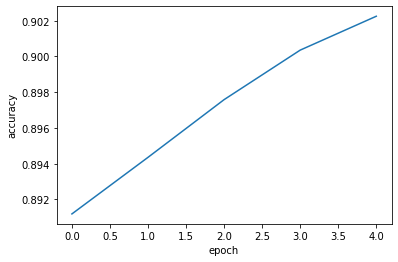

In [ ]:
#정확도 시각화 
plt.plot(history.history['accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

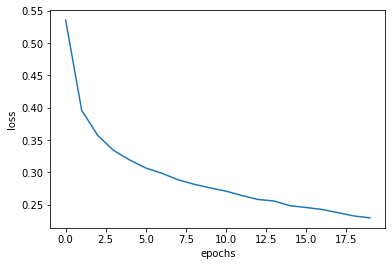

In [ ]:
#에포크 횟수 20으로 늘려서 실행하기 
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20, verbose=0) #epochs 20으로 늘리기

plt.plot(history.history['loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

##검증 손실 
  - 검증데이터로 손실 검증 


In [ ]:
model = model_fn()

model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target) )
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


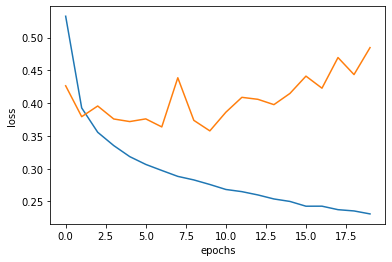

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

In [ ]:
#옵티마이저 변경하여 과대적합 완화하기
model = model_fn()
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit (train_scaled, train_target, epochs=20, verbose=20, validation_data=(val_scaled, val_target))
print(history)

Epoch 1/20
Epoch 2/20
Epoch 3/20
Epoch 4/20
Epoch 5/20
Epoch 6/20
Epoch 7/20
Epoch 8/20
Epoch 9/20
Epoch 10/20
Epoch 11/20
Epoch 12/20
Epoch 13/20
Epoch 14/20
Epoch 15/20
Epoch 16/20
Epoch 17/20
Epoch 18/20
Epoch 19/20
Epoch 20/20


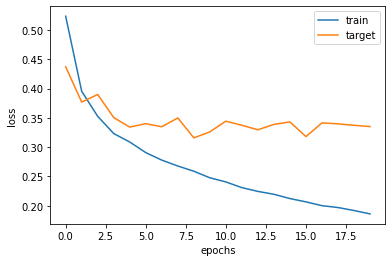

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train', 'target'])
plt.show()

## 규제방법 - 드롭아웃
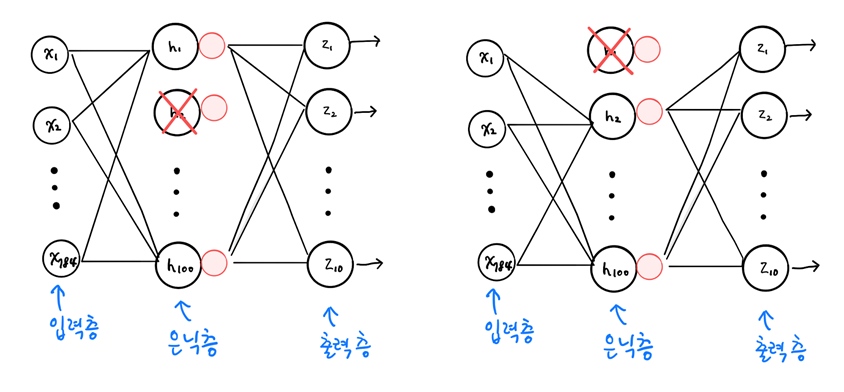

In [ ]:
#드랍아웃 층 만들기 (모델 훈련시 과대적합을 방지하기 위한 방법. 평가와 예측에는 사용하지 않음)
model = model_fn(keras.layers.Dropout(0.3))
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_10 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_29 (Dense)             (None, 100)               78500     
_________________________________________________________________
dropout (Dropout)            (None, 100)               0         
_________________________________________________________________
dense_30 (Dense)             (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target))

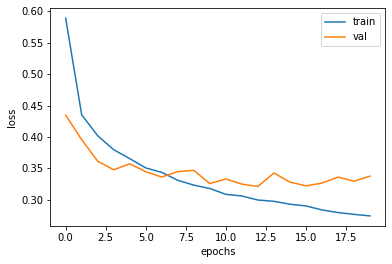

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

### 실습3. 위 모델을 드롭아웃 0.4 비율로 생성하고, 옵티마이저를 rmsprop 으로 설정하여 모델을 학습하시오. 이 모델의 훈련, 검증 손실을 차트로 그리시오. 

In [ ]:
#1) 드랍아웃 층 만들기 (모델 훈련시 과대적합을 방지하기 위한 방법. 평가와 예측에는 사용하지 않음)


Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_13 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_35 (Dense)             (None, 100)               78500     
_________________________________________________________________
dropout_3 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_36 (Dense)             (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#2) 옵티마이저를 rmsprop으로 설정하고 컴파일 한 후, 훈련 시키기 


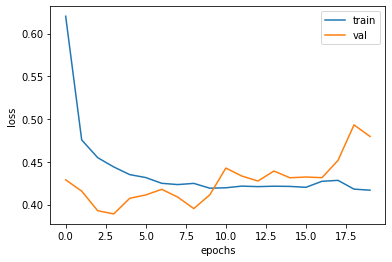

In [ ]:
#3) 훈련 및 검증 손실 그래프 그래기 
